# Generate Phylogeny tree
* For a particular protein, there are multiple taxonomic assignment originate from different databases.

In [1]:
from ete3 import NCBITaxa, Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace
from ete3 import ClusterTree

ncbi = NCBITaxa()


Error in tree ncbi
Error in tree ncbi
Error in tree ncbi


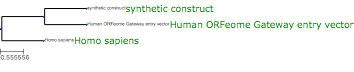

In [2]:


def layout(node):

    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=2)
        try:
            txt2name=ncbi.get_taxid_translator([node.name])

            for item in txt2name:
                sci_name =txt2name[item]

            faces.add_face_to_node(TextFace(sci_name, fsize=30), node, column=0)

        except:
            print("Error in tree ncbi")

tax_list = [9606, 32630, 1958742]
# tree = ncbi.get_topology(tax_list, intermediate_nodes=False)
tree= Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);")

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)


In [4]:

tree= Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);")

 
matrix = """
#Names\tRefSeq\tGenBank\tPDB\tSwissProt\tTrEMBL
Homo sapiens\t1\t5.0\t0\t1\t0  
synthetic construct\t0\t1\t0\t0\t0  
Human ORFeome Gateway entry vector\t1\t0\t0\t0\t0  
"""
print ("Example numerical matrix")
print (matrix)

t = ClusterTree(tree.write(),  text_array=matrix)

Example numerical matrix

#Names	RefSeq	GenBank	PDB	SwissProt	TrEMBL
Homo sapiens	1	5.0	0	1	0  
synthetic construct	0	1	0	0	0  
Human ORFeome Gateway entry vector	1	0	0	0	0  



cluster_bars


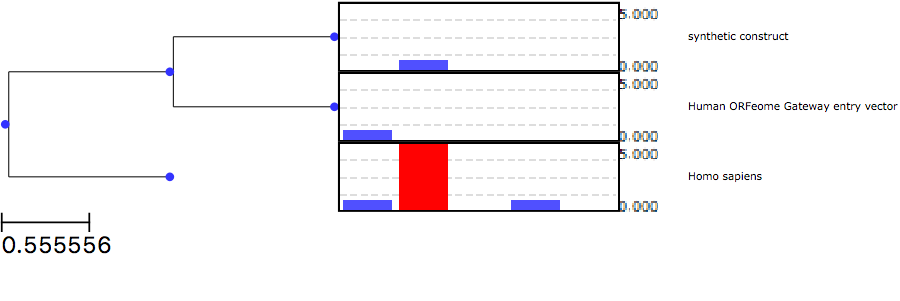

In [5]:
print("cluster_bars")
t.render("%%inline", "cluster_bars", w=900)